In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd

import seaborn as sns
from scipy.stats import norm, skew

import fastai
from fastai.tabular import *

import os

In [3]:
pd.set_option('max_columns', 999)

In [4]:
PATH = os.getcwd()
PATH

'/home/ubuntu/kaggles/houses'

# Load data
Loaded train csv (split to train and validation) and test csv to Pandas df

In [5]:
cat_names = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BsmtCond',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
            'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFinSF1', 'BsmtFinSF2']
cont_names = ['LotFrontage', 'LotArea', 'MasVnrArea',    '1stFlrSF', '2ndFlrSF',
              'GrLivArea',  'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
#               'BsmtUnfSF', 
              'TotalBsmtSF', 
#               'GarageArea',
             ]
all_columns = cat_names + cont_names
dep_var = 'SalePrice'

In [6]:
dtypes_cat = {cat:'category' for cat in cat_names}
dtypes_cont = {cont:np.float32 for cont in cont_names}
dtypes = {**dtypes_cat, **dtypes_cont, dep_var:np.float32}
# dtypes

In [7]:
train_csv_df = pd.read_csv(f'{PATH}/data/train.csv', dtype=dtypes, na_values=['NA'])
train_csv_df = train_csv_df[all_columns+[dep_var]]
train_csv_df["LotFrontage"] = train_csv_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
train_csv_df["MasVnrArea"] = train_csv_df["MasVnrArea"].fillna(0)
# train_csv_df.info()

In [8]:
# train_csv_df.describe(percentiles=[.01, .25,.5,.75,.9,.99])

In [9]:
train_csv_df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,BsmtFinSF1,BsmtFinSF2,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,TotalBsmtSF,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,TA,TA,Y,0,0,0,2,2008,WD,Normal,706,0,65.0,8450.0,196.0,856.0,854.0,1710.0,0.0,61.0,0.0,856.0,208500.0
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,TA,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,TA,TA,Y,0,0,0,5,2007,WD,Normal,978,0,80.0,9600.0,0.0,1262.0,0.0,1262.0,298.0,0.0,0.0,1262.0,181500.0
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,TA,TA,Y,0,0,0,9,2008,WD,Normal,486,0,68.0,11250.0,162.0,920.0,866.0,1786.0,0.0,42.0,0.0,920.0,223500.0
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Gd,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,TA,TA,Y,272,0,0,2,2006,WD,Abnorml,216,0,60.0,9550.0,0.0,961.0,756.0,1717.0,0.0,35.0,0.0,756.0,140000.0
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,TA,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,TA,TA,Y,0,0,0,12,2008,WD,Normal,655,0,84.0,14260.0,350.0,1145.0,1053.0,2198.0,192.0,84.0,0.0,1145.0,250000.0


In [10]:
test_csv_df = pd.read_csv(f'{PATH}/data/test.csv', index_col='Id', dtype=dtypes)
test_csv_df = test_csv_df[all_columns]
test_csv_df["LotFrontage"] = test_csv_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_csv_df["MasVnrArea"] = test_csv_df["MasVnrArea"].fillna(0)
test_csv_df["TotalBsmtSF"] = test_csv_df["TotalBsmtSF"].fillna(0)
test_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 71 columns):
MSSubClass       1459 non-null category
MSZoning         1455 non-null category
Street           1459 non-null category
LotShape         1459 non-null category
LandContour      1459 non-null category
Utilities        1457 non-null category
LotConfig        1459 non-null category
LandSlope        1459 non-null category
Neighborhood     1459 non-null category
BsmtCond         1414 non-null category
Condition1       1459 non-null category
Condition2       1459 non-null category
BldgType         1459 non-null category
HouseStyle       1459 non-null category
OverallQual      1459 non-null category
OverallCond      1459 non-null category
YearBuilt        1459 non-null category
YearRemodAdd     1459 non-null category
RoofStyle        1459 non-null category
RoofMatl         1459 non-null category
Exterior1st      1458 non-null category
Exterior2nd      1458 non-null category
MasVnrType

In [11]:
cat_sz = [(c, len(train_csv_df[c].cat.categories)+1) for c in cat_names]
# cat_sz

In [12]:
emb_szs = {c: min(50, (c+1)//2) for _,c in cat_sz}
# emb_szs

In [13]:
#show plot skew for feature
# sns.distplot(train_csv_df['ScreenPorch'] , fit=norm);

In [14]:
# train_csv_df[train_csv_df['LowQualFinSF']>0].shape

In [15]:
#Skew
skewed_feats = train_csv_df[cont_names].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skew_columns = skewness[skewness['Skew']>0.75]
skew_columns

,Skew
LotArea,12.195138
ScreenPorch,4.117977
MasVnrArea,2.674865
OpenPorchSF,2.361912
LotFrontage,2.210684
WoodDeckSF,1.539791
TotalBsmtSF,1.522688
1stFlrSF,1.375342
GrLivArea,1.365156
2ndFlrSF,0.812194


In [16]:
train_csv_df[dep_var] = np.log1p(train_csv_df[dep_var])

for col in skew_columns.index:
    train_csv_df[col] = np.log1p(train_csv_df[col])
    test_csv_df[col] = np.log1p(test_csv_df[col])

# Models

In [17]:
procs = [FillMissing, Categorify, Normalize]

In [18]:
test_data = TabularList.from_df(test_csv_df, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs )

In [19]:
data = (
    TabularList.from_df(train_csv_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         no_split()
        .random_split_by_pct(valid_pct=0.1, seed=1337)
        .label_from_df(cols=dep_var, label_cls=FloatList)
        .add_test(test_data)
        .databunch(bs=128, num_workers=8 )
)

In [20]:
data.show_batch(rows=10)

MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,BsmtFinSF1,BsmtFinSF2,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,TotalBsmtSF,target
50,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,TA,Norm,Norm,1Fam,1.5Fin,5,4,1900,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,No,Unf,Unf,GasA,Gd,N,FuseA,0,0,1,0,3,1,TA,6,Typ,0,#na#,Attchd,1940,Unf,1,Fa,TA,Y,77,0,0,4,2006,WD,Normal,0,0,-0.1839,-1.1498,-0.7988,-0.6737,1.0406,0.0072,-0.9633,-1.0817,-0.3011,-0.4226,11.277215957641602
60,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,TA,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,6,Typ,0,#na#,Attchd,1976,RFn,2,TA,TA,Y,0,0,0,3,2010,WD,Normal,533,0,0.1757,0.7439,1.3621,-1.3042,1.1357,0.0869,-0.9633,0.6882,-0.3011,-0.1580,11.779135704040527
80,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Veenker,TA,Feedr,Norm,1Fam,SLvl,5,7,1978,1978,Gable,CompShg,Plywood,Plywood,None,TA,TA,PConc,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,1,0,1,1,2,1,Gd,5,Typ,1,TA,Attchd,1978,Unf,2,TA,TA,Y,0,0,0,6,2007,WD,Normal,680,391,0.0458,1.0836,-0.7988,0.8008,-0.8753,-0.0094,1.0158,1.3353,-0.3011,0.4071,12.175618171691895
20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,TA,Norm,Norm,1Fam,1Story,6,8,1958,2002,Hip,CompShg,MetalSd,MetalSd,None,Ex,TA,CBlock,Gd,No,ALQ,BLQ,GasA,Ex,Y,SBrkr,1,0,1,0,3,1,TA,6,Min1,1,TA,Attchd,1990,Unf,2,TA,TA,Y,0,0,0,5,2008,WD,Normal,528,411,0.7883,0.3565,-0.7988,0.7617,-0.8753,-0.0471,-0.9633,0.7554,3.3666,0.2826,12.08108139038086
20,RL,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,TA,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,Gd,GLQ,Unf,GasA,TA,Y,SBrkr,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971,Unf,2,TA,TA,Y,0,0,0,6,2007,WD,Normal,1219,0,0.5353,4.8235,1.4360,1.5494,-0.8753,0.7118,1.3294,0.7278,-0.3011,0.5770,12.618185997009277
190,RL,Pave,IR1,Bnk,AllPub,Corner,Mod,OldTown,TA,Artery,Artery,2fmCon,2Story,3,5,1900,1970,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Fa,Mn,BLQ,Unf,GasA,TA,Y,SBrkr,1,0,2,0,3,2,TA,7,Typ,0,#na#,CarPort,1920,Unf,2,Fa,Fa,Y,0,0,0,8,2009,WD,Abnorml,440,0,1.4136,0.2837,-0.7988,-0.2668,1.1066,0.5002,-0.9633,0.9257,-0.3011,0.1108,11.461642265319824
20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,TA,Feedr,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2008,Fin,3,TA,TA,Y,0,0,0,12,2009,New,Partial,0,0,0.3003,0.0947,0.8364,0.8777,-0.8753,0.0646,1.1014,1.2511,-0.3011,0.4758,12.407383918762207
60,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,TA,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,7,Typ,0,#na#,Attchd,2000,RFn,2,TA,TA,Y,0,0,0,1,2010,WD,Normal,533,0,0.2799,-0.3777,-0.7988,-0.9462,1.1755,0.4560,-0.9633,1.0453,-0.3011,-0.0540,12.283038139343262
70,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,TA,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,TA,Fa,BrkTil,TA,No,Unf,Unf,GasA,TA,N,SBrkr,0,0,1,0,3,1,TA,6,Typ,0,#na#,Detchd,1920,Unf,1,TA,Fa,N,172,0,0,7,2008,WD,Normal,0,0,-0.8771,-0.1394,-0.7988,-1.6465,1.0990,-0.2589,-0.9633,0.7815,-0.3011,-0.2575,10.596659660339355
85,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,TA,Norm,Norm,1Fam,SFoyer,5,6,1982,1982,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,Av,ALQ,Unf,GasA,TA,Y,SBrkr,1,0,1,0,

In [66]:
# learner = tabular_learner(data, layers=[128, 64], emb_drop=0.1, ps = 0.15, emb_szs=emb_szs,  
#                           metrics=[root_mean_squared_error, accuracy_thresh])

learner = tabular_learner(data, layers=[512,128], emb_drop=0.3, ps = 0.5, emb_szs=emb_szs, metrics=[root_mean_squared_error])
                          
print(learner.summary())

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [128, 8]             128        True      
______________________________________________________________________
Embedding            [128, 4]             24         True      
______________________________________________________________________
Embedding            [128, 3]             9          True      
______________________________________________________________________
Embedding            [128, 4]             20         True      
______________________________________________________________________
Embedding            [128, 4]             20         True      
______________________________________________________________________
Embedding            [128, 3]             9          True      
______________________________________________________________________
Embedding            [128, 4]             24         True      
______________________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


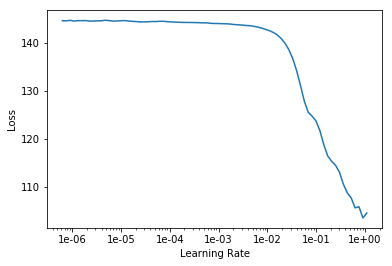

In [67]:
# lr = 5e-2
learner.lr_find()
learner.recorder.plot()

In [68]:
learner.fit(50, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error
1,133.954941,114.215469,10.690008
2,109.801758,49.733524,7.056338
3,76.312782,1.234568,1.136143
4,53.577854,6.856401,2.653843
5,40.057846,0.197120,0.578041
6,30.560301,1.841931,1.432340
7,23.889494,0.311328,0.794235
8,19.017332,0.166689,0.548128
9,15.321744,0.215028,0.715217
10,12.545933,0.137882,0.447593


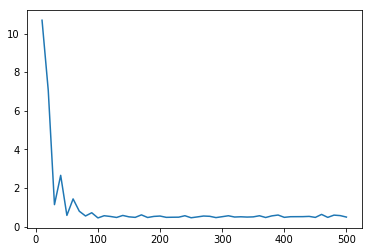

In [69]:
learner.recorder.plot_metrics()

In [70]:
predicted, _ = learner.get_preds(ds_type=DatasetType.Test)
predicted = np.expm1(predicted)
len(predicted)

1459

In [71]:
test_csv_df_idx = test_csv_df.index.tolist()
predicted_list = list(zip(test_csv_df_idx, sum(predicted.tolist(), [])))
submission_df = pd.DataFrame(data=predicted_list, columns=['Id','SalePrice'])
print(submission_df.shape)
print(submission_df.head())

(1459, 2)
     Id      SalePrice
0  1461  130261.828125
1  1462  168710.421875
2  1463  186227.796875
3  1464  196989.781250
4  1465  167007.937500


In [72]:
submission_file = 'submission-nn.csv'
submission_file_comment = """preprocessing of features added
tabular_learner(data, layers=[512,128], emb_drop=0.3, ps = 0.5, emb_szs=emb_szs, metrics=[root_mean_squared_error])
learner.fit(50, 1e-2)
"""
submission_df.to_csv(submission_file, index=False)

In [73]:
from IPython.display import FileLink, FileLinks

FileLink(submission_file)

/home/ubuntu/kaggles/houses/submission-nn.csv

In [74]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f {submission_file} -m "{submission_file_comment}"

100%|██████████████████████████████████████| 25.5k/25.5k [00:02<00:00, 12.0kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques